In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras
import string



Saving archive (1).zip to archive (1).zip
Archive:  archive (1).zip
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-0.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-1.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-10.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-100.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-1000.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-1001.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-1002.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-1003.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-1004.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-1005.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-1006.png  
  inflating: dataset/CleanedImages/Encoder_Clean_Renamed/s01-000-00-1007

<ipython-input-1-5a3d04e4efe5>:31: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((784,32), Image.ANTIALIAS)


No of Images : 1774
Characters :  abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789.,*&!@~():`^]¢‘;|-«
No of chars : 82


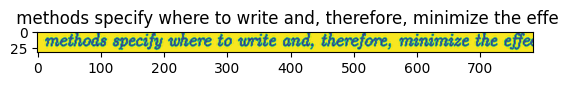

In [1]:
from google.colab import files
uploaded = files.upload()
!unzip "archive (1).zip" -d "dataset"
from PIL import Image
import matplotlib.pyplot as plt
import string
import numpy as np

# Open the text file
text_file_path = "dataset/UsedSentences.txt"
text_file = open(text_file_path, "r")

details = []
outputs = []
names = []
for line in text_file:
    a = line.split('#')
    outputs.append(a[1].strip('\n'))
    details.append(a[0])

for detail in details:
    a = detail.split(' ')
    names.append(a[0])

X = []

# Adjusted image path based on the extracted directory
image_folder_path = "dataset/CleanedImages/Encoder_Clean_Renamed/"
for name in names:
    img = Image.open(image_folder_path + name + '.png', 'r')
    img = img.resize((784,32), Image.ANTIALIAS)
    img = np.asarray(img)
    img = img[:,:,0]
    X.append(img)

X = np.asarray(X)
plt.imshow(X[42])
plt.title(outputs[42])
print("No of Images :", X.shape[0])

symbols = " " + string.ascii_lowercase + string.ascii_uppercase + "0123456789.,*&!@~():`^]¢‘;|-«"
print("Characters :", symbols)
print("No of chars :", len(symbols))


In [2]:
Y=np.zeros(shape=(len(outputs),98,len(symbols)))
for example_no,name in enumerate(outputs):
    for letter_no,letter in enumerate(name):
        try:
            Y[example_no][letter_no][symbols.index(letter)]=1
        except:
            print(letter,end=" ")




In [ ]:
X=np.reshape(X,(X.shape[0],X.shape[1],X.shape[2],1))
print("Shape of X is :",X.shape)

Shape of X is : (1774, 32, 784, 1)


In [3]:
# Neural Network Model
# Try Removing Batch Normalisation and see how the performance decreases.
def OCRModel():
    image=keras.layers.Input((32,784,1))
    conv1=keras.layers.Conv2D(16,(3,3),activation='relu',padding='same')(image)
    mp1=keras.layers.MaxPooling2D((2,2),padding='same')(conv1)
    conv2=keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(mp1)
    mp2=keras.layers.MaxPooling2D((2,2),padding='same')(conv2)
    conv3=keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(mp2)
    mp3=keras.layers.MaxPooling2D((2,2),padding='same')(conv3)
    conv4=keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(mp3)
    mp4=keras.layers.MaxPooling2D((2,1),padding='same')(conv4)
    conv5=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp4)
    mp5=keras.layers.MaxPooling2D((2,1),padding='same')(conv5)
    conv6=keras.layers.Conv2D(256,(3,3),activation='relu',padding='same')(mp5)
    # mp6=keras.layers.MaxPooling2D((1,3),padding='same')(conv6)
    bn=keras.layers.BatchNormalization()(conv6)
    sq=keras.backend.squeeze(bn,axis=1)

    rn1=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(sq)
    rn2=keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True))(rn1)

    exd=keras.backend.expand_dims(rn2,axis=2)
    maping=keras.layers.Conv2D(len(symbols),(2,2),activation='relu',padding='same')(exd)
    maping=keras.backend.squeeze(maping,axis=2)
    maping = tf.keras.layers.Softmax()(maping)

    # bn = keras.layers.BatchNormalization()(conv3)
    model=keras.Model(image,maping)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    return model


In [10]:
!pip install pydot
!apt-get install -y graphviz
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
OCR=OCRModel()
OCR.fit(X,Y,epochs=50)
# plot_model(OCR, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
Epoch 1/50
56/56 [==============================] - 196s 3s/step - loss: 1.6139
Epoch 2/50
56/56 [==============================] - 186s 3s/step - loss: 1.5053
Epoch 3/50
56/56 [==============================] - 189s 3s/step - loss: 1.4851
Epoch 4/50
56/56 [==============================] - 187s 3s/step - loss: 1.4698
Epoch 5/50
56/56 [==============================] - 191s 3s/step - loss: 1.4365
Epoch 6/50
56/56 [==============================] - 190s 3s/step - loss: 1.3871
Epoch 7/50
56/56 [==============================] - 187s 3s/step - loss: 1.3246
Epoch 8/50
56/56 [==============================] - 190s 3s/step - loss: 1.2183
Epoch 9/50
56/56 [==============================] - 180s 3s/step - loss: 1.0969
Epoch 10/50
56/56 [==============================] - 179s 3s/step - 

Decoding the Output of the Model and Comparing it.....

56/56 [==============================] - 47s 826ms/step
98
predicted: filter that replaces the pixel values with the neighb

Orignal:  filter that replaces the pixel values with the neighb


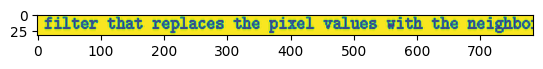

In [12]:
xx=OCR.predict(X)
index=466
c=""
print(len(xx[0]))
for i in range(len(xx[0])):
    c=c+(symbols[np.argmax(xx[index][i])])
print("predicted:",c.strip())
print("\nOrignal:",outputs[index])
plt.imshow(X[index])
